# Covid Cases in Portugal

The data in this use case is compiled and generously provided by [VOST PT](https://vost.pt/). VOST is a volunteer organisation of digital volunteers that assist Civil Protection services with online information, data analysis, fact-checking, and communication of ongoing events. VOST covers extreme weather, ongoing forest fires, and more recently, have doing an amazing work with spreading validated information about the pandemic. Follow them on twitter:
 
<img src="../Figures/vost.jpg" width=200>
 

* [VOST PT](https://twitter.com/VOSTPT)
* [VOST ES](https://twitter.com/vostSPAIN)
* [VOST DE](https://twitter.com/VOST_de)
* [VOST Europe](https://twitter.com/VOSTeurope)  
And many more!

---
## Reading the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv")

In [3]:
df.head(3)

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,...,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m,confirmados_desconhecidos_m,confirmados_desconhecidos_f,ativos,internados_enfermaria,confirmados_desconhecidos
0,26-02-2020,26-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27-02-2020,27-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28-02-2020,28-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['data', 'data_dados', 'confirmados', 'confirmados_arsnorte',
       'confirmados_arscentro', 'confirmados_arslvt',
       'confirmados_arsalentejo', 'confirmados_arsalgarve',
       'confirmados_acores', 'confirmados_madeira', 'confirmados_estrangeiro',
       'confirmados_novos', 'recuperados', 'obitos', 'internados',
       'internados_uci', 'lab', 'suspeitos', 'vigilancia', 'n_confirmados',
       'cadeias_transmissao', 'transmissao_importada', 'confirmados_0_9_f',
       'confirmados_0_9_m', 'confirmados_10_19_f', 'confirmados_10_19_m',
       'confirmados_20_29_f', 'confirmados_20_29_m', 'confirmados_30_39_f',
       'confirmados_30_39_m', 'confirmados_40_49_f', 'confirmados_40_49_m',
       'confirmados_50_59_f', 'confirmados_50_59_m', 'confirmados_60_69_f',
       'confirmados_60_69_m', 'confirmados_70_79_f', 'confirmados_70_79_m',
       'confirmados_80_plus_f', 'confirmados_80_plus_m', 'sintomas_tosse',
       'sintomas_febre', 'sintomas_dificuldade_respiratoria',
     

In the dataframe, __'data_dados'__ is the Date for the Data. We will look only at __"confirmados_novos"__ which is the New Confirmed cases per day.

Let's rename the columns for convenience.

In [5]:
df.rename(columns={'data_dados':'date', 'confirmados_novos':'new_cases'}, inplace=True)

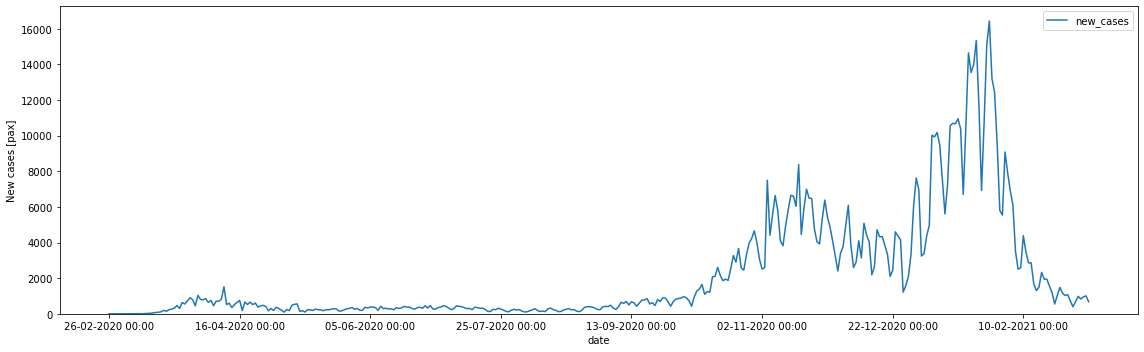

In [6]:
fig, ax = plt.subplots(figsize=(16,5))
df.plot(x='date', y='new_cases', ax=ax)
ax.set_ylabel("New cases [pax]")
ax.set_ylim(bottom=0)
plt.tight_layout()
plt.show()

---

In [7]:
### Real Fourier Transform: y-axis
freqdomain = np.fft.rfft(df['new_cases'].values)

### Conversion into "events per day": x-axis
freqdays = np.linspace(0, 0.5, len(freqdomain))

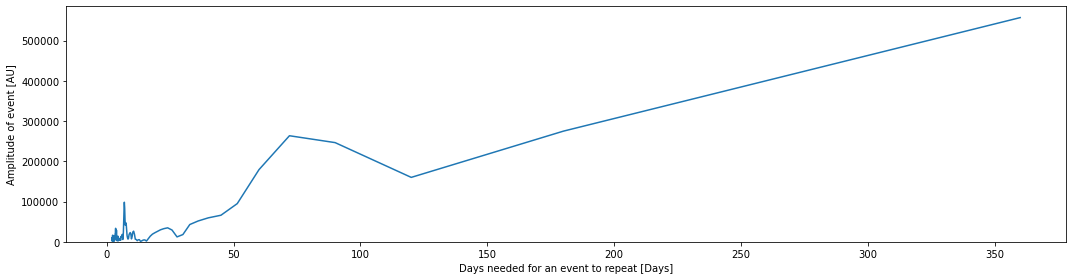

In [8]:
fig, ax = plt.subplots(figsize=(15, 4))

## Since we will do a division, it is usually best to trim a point from the arrays
beginning_index = 1
last_index = -1

ax.plot(1/freqdays[beginning_index:last_index], np.abs(freqdomain)[beginning_index:last_index])
ax.set_xlabel("Days needed for an event to repeat [Days]")
ax.set_ylabel("Amplitude of event [AU]")
ax.set_ylim(bottom=0)

plt.tight_layout()
plt.show()

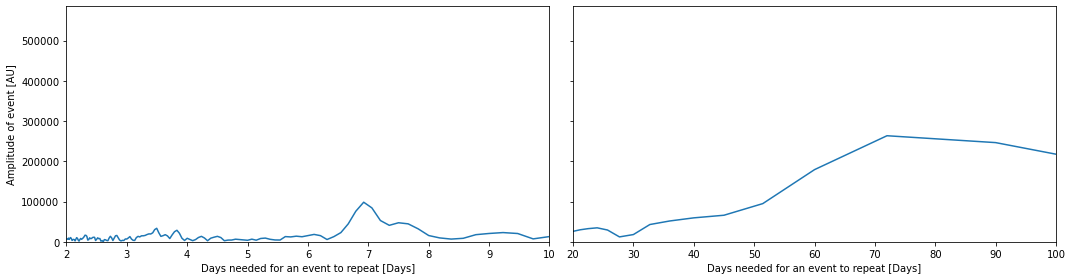

In [9]:
fig, ax = plt.subplots(figsize=(15, 4), ncols=2, sharey=True)

## Since we will do a division, it is usually best to trim a point from the arrays
beginning_index = 1
last_index = -1

ax[0].plot(1/freqdays[beginning_index:last_index], np.abs(freqdomain)[beginning_index:last_index])
ax[0].set_xlim(2, 10)
ax[0].set_xlabel("Days needed for an event to repeat [Days]")
ax[0].set_ylabel("Amplitude of event [AU]")
ax[0].set_ylim(bottom=0)

ax[1].plot(1/freqdays[beginning_index:last_index], np.abs(freqdomain)[beginning_index:last_index])
ax[1].set_xlim(20, 100)
ax[1].set_xlabel("Days needed for an event to repeat [Days]")

plt.tight_layout()
plt.show()

<div class="alert alert-info">
    <b>Relative amplitude of FFT output is related to amplitude in original signal. The second and third wave dominate completely, but we see the "outiler" at seven days.</b>      
    <br>
<\div>